## Linear Regression, Raja Batra, Sep 6, 2023

In [393]:
import pandas as pd

# Question 1
## Part B

In [394]:
data2 = pd.read_csv('testScores.csv')

In [395]:
##normalize data
data2[data2.columns] =( data2[data2.columns] - data2[data2.columns].mean() ) / data2[data2.columns].std()


In [396]:
print(data2.columns)
data = data2[['EXAM1', 'FINAL']]

Index(['EXAM1', 'EXAM2', 'EXAM3', 'FINAL', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')


In [397]:
import matplotlib.pyplot as plt
import numpy as np

In [398]:
X = data['EXAM1']
Xbar = sum(X)/len(X)
Y = data['FINAL']
Ybar = sum(Y)/len(Y)

In [399]:
numerator_slope = np.sum((Y - Ybar) * (X - Xbar))
denominator_slope = np.sum((X-Xbar)*(X-Xbar))

In [400]:
print(numerator_slope)
print(denominator_slope)
slope = numerator_slope/denominator_slope
print(slope)

22.70569996344487
23.999999999999996
0.9460708318102031


### From the analytical solution I got my slope to be 0.946 and the intercept to be very close to 0

<function matplotlib.pyplot.show(close=None, block=None)>

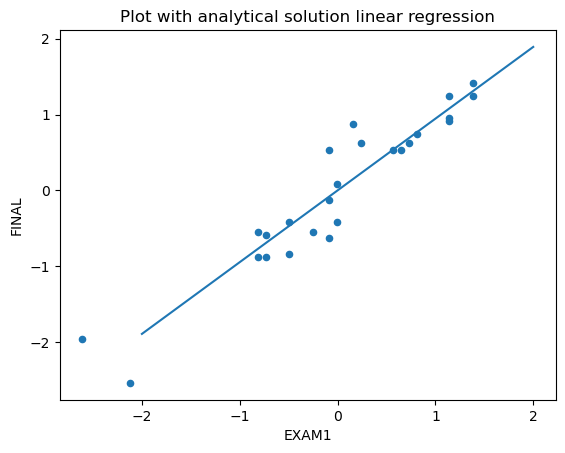

In [401]:
slope = numerator_slope/denominator_slope
intercept = -2.70e-17

# Generate x values
xval = np.linspace(-2, 2, 100) 
y = slope * xval + intercept
data.plot.scatter(x='EXAM1', y='FINAL')
plt.plot(xval, y)
plt.title('Plot with analytical solution linear regression')
plt.show

## Part C

In [402]:

w = [0, 0]

x = data['EXAM1']
y = data['FINAL']

lista = []
listb = []
listmse = []
lmbda = .01
for i in range(100):
    a = w[0]
    b = w[1]
    agrad = np.mean(-2 * x * (y - a * x - b))
    bgrad = np.mean(-2 * (y - a * x - b))
    lista.append(a)
    listb.append(b)
    mse = np.mean((y - a* x - b)*(y - a* x - b))
    
    listmse.append(mse)
    w[0] = w[0] - agrad 
    w[1] = w[1] - bgrad 
    #w = np.subtract(w, [agrad, bgrad]) 

### check value using gradient descent

In [403]:

print(w)

[0.9458445204329674, 1.1998874116514478e-14]


<function matplotlib.pyplot.show(close=None, block=None)>

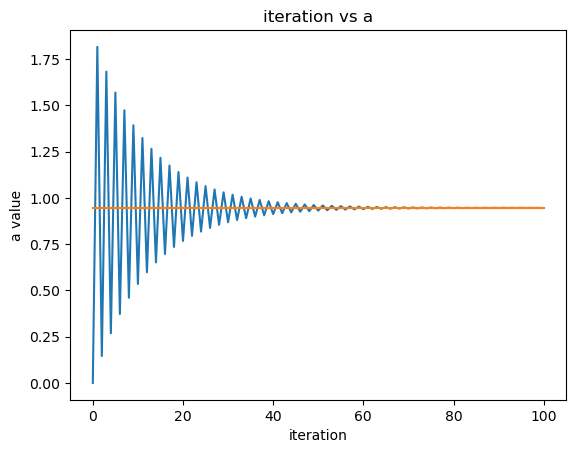

In [404]:


#plot trajectory of a
xval = np.linspace(0, 100, 100) 
xval2 = np.linspace(0.9461, 0.9461, 100) 
plt.plot(range(100), lista)
plt.plot(xval, xval2)
plt.xlabel('iteration')
plt.ylabel('a value')
plt.title('iteration vs a')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

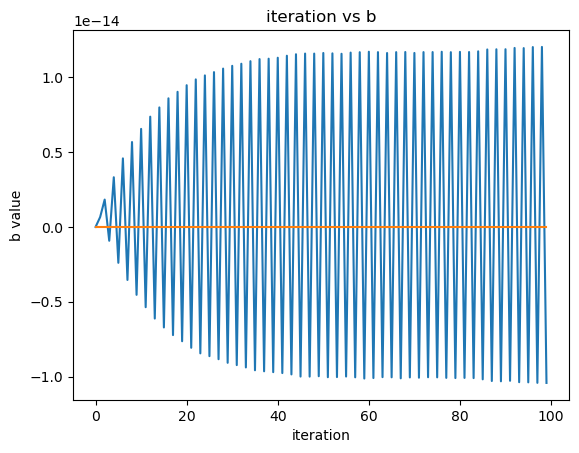

In [405]:
#plot trajectory of b
plt.xlabel('iteration')
plt.ylabel('b value')
plt.title('iteration vs b')
plt.plot(range(100), listb)
plt.plot(range(100), np.linspace(-2.7e-17, -2.7e-17, 100) )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

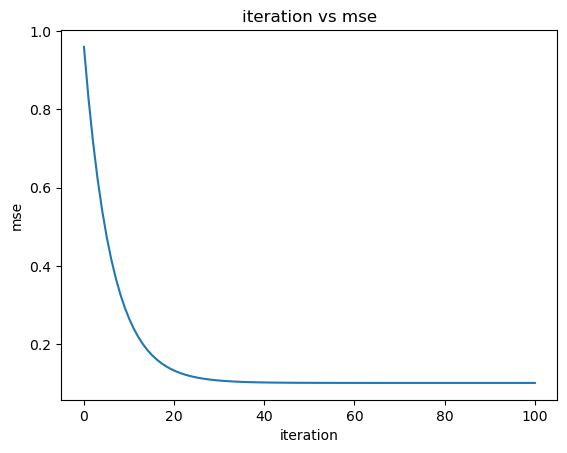

In [406]:
plt.plot(xval, listmse)
plt.xlabel('iteration')
plt.ylabel('mse')
plt.title('iteration vs mse')
plt.show

# Problem 2

## Part A

In [407]:

data3 = data2[['EXAM1', 'EXAM2', 'EXAM3', 'FINAL']]


In [416]:
w = np.random.randn(4)
Xord = np.c_[data3['EXAM1'], data3['EXAM2'], data3['EXAM3'], np.ones((25, 1))]
Xord = np.array(Xord)

finalsscore = np.array(data3['FINAL'])
liste = []
#hyperparams
lmbda = .01
for i in range(100):
    #wgrad = (2/25)* Xord.T.dot(Xord.dot(w) - finalsscore)
    
    wgrad = -2 * np.matmul(np.transpose(Xord), finalsscore) +2 * np.matmul(np.transpose(Xord), np.matmul(Xord, w))

    
    w = w - lmbda * wgrad
 
    # predictions = Xord.dot(w)
    error = np.mean((Xord.dot(w) - finalsscore)*(Xord.dot(w) - finalsscore))
    
    liste.append(error)
    
print(w)


[1.86441496e-01 2.79240806e-01 5.69401693e-01 6.83393828e-16]


## the coefficients verified by analytical approach were: 1.81988377e-01 2.82008246e-01 5.71170657e-01 3.92194118e-17

<function matplotlib.pyplot.show(close=None, block=None)>

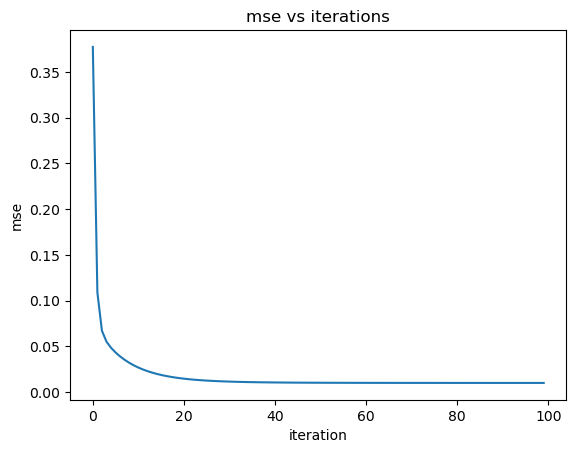

In [417]:

plt.title('mse vs iterations')
plt.plot(range(100), liste)
plt.xlabel('iteration')
plt.ylabel('mse')
plt.show

# Part B L2 Regularization

In [424]:
w = np.random.randn(4)
lr = .01

lmda = 1
listloss = []
for i in range(100):
    wgrad = -2*np.matmul(np.transpose(Xord), finalsscore) +2 * np.matmul(np.transpose(Xord), np.matmul(Xord, w)) + 2*lmda*w
    
    loss = np.mean((np.matmul(Xord, w) - finalsscore)*(np.matmul(Xord, w) - finalsscore)) + lmda*np.mean(w*w)
  
    w = w - lr*wgrad
    listloss.append(loss)
    

print(w)

[2.26784590e-01 2.81384677e-01 5.10605681e-01 6.59155354e-16]


### coefficients are: [2.26784590e-01 2.81384677e-01 5.10605681e-01 6.59155354e-16]




<function matplotlib.pyplot.show(close=None, block=None)>

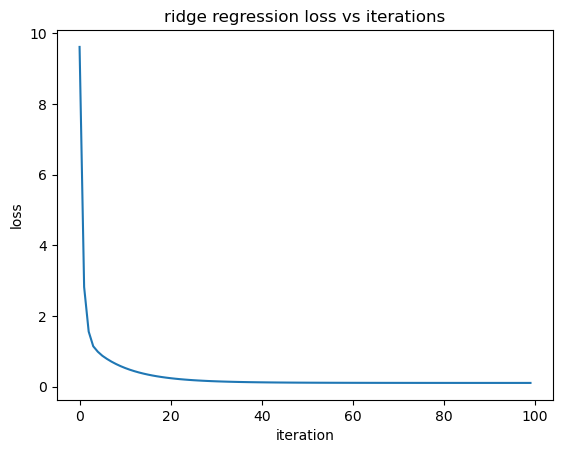

In [425]:
plt.title('ridge regression loss vs iterations')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(100), listloss)
plt.show

### Higher lambda value decreases the values of the coefficients

# Part C

In [422]:
w = np.random.randn(4)
lr2 = .01
lmda2 = 1
listloss2 = []
for i in range(100):
    wgrad = -2*np.matmul(np.transpose(Xord), finalsscore) +(2 * np.matmul(np.transpose(Xord), np.matmul(Xord, w))) + lmda2*w
 
    loss = np.mean((Xord.dot(w) - finalsscore)*(Xord.dot(w) - finalsscore)) + lmda2*np.mean(w*w)
    w = w - lr2*wgrad
    listloss2.append(loss)
print(w)

[2.14459305e-01 2.77933488e-01 5.34323593e-01 6.86652346e-16]


### coefficients are: [2.14459305e-01 2.77933488e-01 5.34323593e-01 6.86652346e-16]

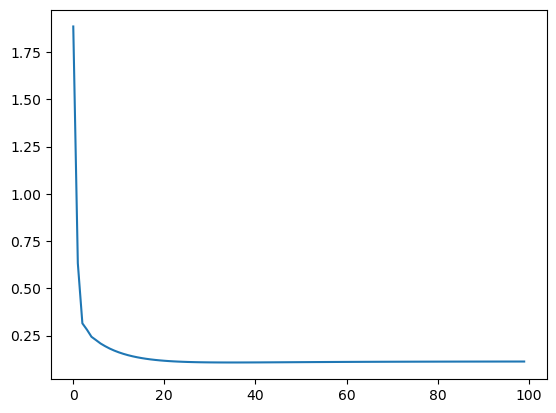

In [423]:
plt.plot(range(100), listloss2)
plt.show()